# -> Stationarity in Time Series :
### A Stationary series is one whose statistical properties such as mean, variance, covariance, and standard deviation do not vary with time, or these stats properties are not a function of time. In other words, stationarity in Time Series also means series without a Trend or Seasonal components. 


# Main Points: 
1. ## What is Stationary ?
2. ## How to Chek Stationarity ?
3. ## How to convert non Stationary to Stationary ?




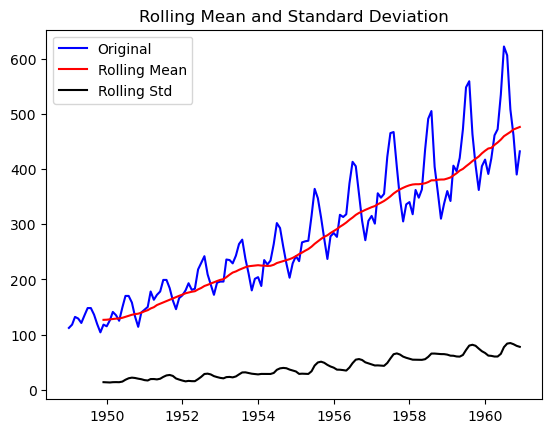

In [38]:

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("sales.csv")
# Creating the 'Date' as Index for data and viewing the dataset
data['Date']=pd.to_datetime(data['Date'], infer_datetime_format=True)
data=data.set_index(['Date'])
# plt.plot(data)# time series graph 
# Preparing the data for analyzing the Rolling Mean and Standard Deviation to check stationarity for given Time Series
rolmean=data.rolling(window=12).mean()
rolstd=data.rolling(window=12).std()
#Plotting the Rolling Mean and Standard Deviation
orig=plt.plot(data,color='blue',label='Original')
mean=plt.plot(rolmean,color='red',label='Rolling Mean')
std=plt.plot(rolstd,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)

# How to Check Stationary :
1. ## Visual Inspection
2. ## Global and Local check
3. ## Dickey-Fuller Test

# Dickey_Fuller_Test:
1. ## If the Pvalue (Lower than 0.05) it implies Series is Stationary.
2. ## High Pvalue(higher than 0.05) implies non stationary .



In [45]:
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(data)
print('p value of adfuller test is :',adftest[1])

p value of adfuller test is : 0.9918802434376411


# How to Make a series Stationary ?
## We have 3 cases for series to be stationary :
1. # Mean -----------Trend--------->Difference.

2. # variance ------Time Varying Seasonility -------->Log.

3. # Autocorrelation----Seasonality-------> Seasonal differencing  
    
 
 

<Axes: xlabel='Date'>

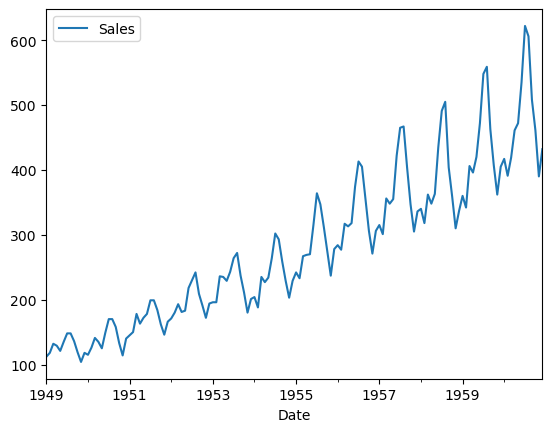

In [50]:
# Let's discuss the case number 1 
# mean---Trend---Difference 
data.plot()

<Axes: xlabel='Date'>

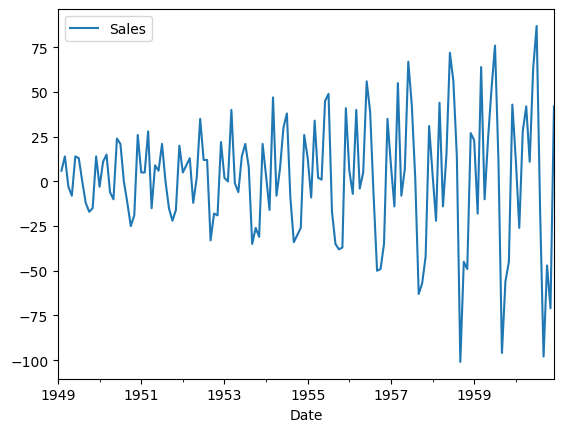

In [54]:
data_1 = data.diff()
data_1.plot()

In [60]:
# Now Again we chek dickey fuller test 
#adf_1 = adfuller(data_1)
adf_1 = adfuller(data_1.dropna())
print('p value of adfuller test is :',adf_1[1])

p value of adfuller test is : 0.05421329028382491


<Axes: xlabel='Date'>

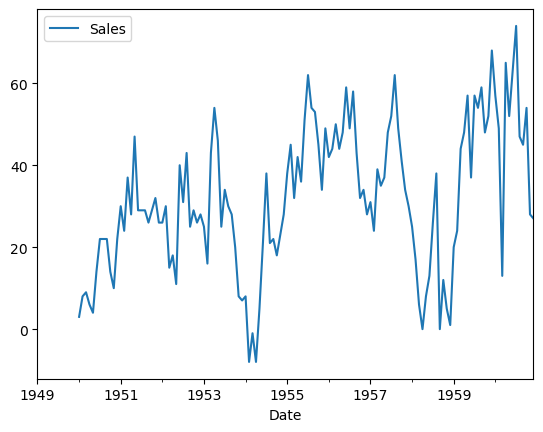

In [68]:
# Seasonal differ with period=12
data_2 = data.diff(periods=12)
data_2.plot()

<Axes: xlabel='Date'>

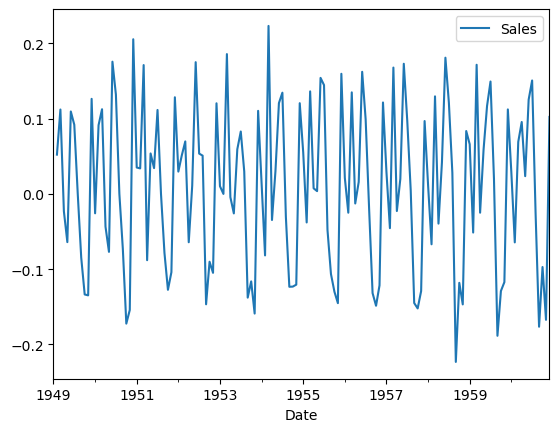

In [74]:
# log difference 
df =  np.log(data)
df1 = df.diff()
df1.plot()

# #Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test 

### A key difference from the ADF test is the null hypothesis of the KPSS test is that the series is stationary. So practically, the interpretation of p-value is just the opposite of each other. That is, if the p-value is < significance level (say 0.05), then the series is non-stationary. Whereas in the ADF test, it would mean the tested series is stationary.


In [84]:
from statsmodels.tsa.stattools import kpss
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
kpss_test(df['Sales'])



Results of KPSS Test:
Test Statistic           1.668651
p-value                  0.010000
#Lags Used               8.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


C:\Users\Hi\AppData\Local\Temp\ipykernel_9148\694229661.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags="auto")


# Note: The hypothesis is reversed in the KPSS test compared to ADF Test.

# Test Statistic > Critical Value and p-value < 0.05. As a result, we reject the Null hypothesis in favor of an Alternative.# 
Hence we conclude series is non-stationary

# When to Choose ADF or KPSS Test?

### There could be a lot of confusion on when one should use the ADF test or KPSS test and which test would give a correct result. A better solution is to apply/run both tests and makes sure that the series is truly stationaryty..


#  The following are the possible outcomes of applying both tests.
1. # #Both tests conclude that the given series is stationary
   ### The series is Stationary
2. # #Both tests conclude that the given series is non-stationary
   ### the series is non stationary
3. # #ADF concludes non-stationary, and KPSS concludes stationary
   ### The series is trend stationary. To make the series strictly stationary, the trend needs to be removed in this case. Then the detrended series is checked for stationarity.
4. # #ADF concludes stationary, and KPSS concludes non-stationary
   ### The series is difference stationary. Differencing is to be used to make series stationary. Then the differenced series is checked for stationarity.



# Detrending and Deseasonalizing

## Deseasonalizing and Detrending time series data are techniques that can be used to remove certain components of the data that are not of interest when forecasting future values. This can help to improve the accuracy of the forecasts by reducing the influence of these extraneous components on the model.

# #Deseasonalizing
## It can be difficult to analyze due to seasonal patterns and other fluctuations that can obscure underlying trends,
That’s where deseasonalizing comes in, allowing you to isolate trends and make more accurate predictions.

# Seasonality :
## In time series refers to a pattern that repeats itself at regular intervals over time.

This pattern could be daily, weekly, monthly, or even yearly, and it’s often caused by factors such as weather patterns, holidays, and other recurring events.

Let’s take the example of a company that sells ice cream.

The sales of ice cream may have a seasonal pattern, with higher sales during the summer and lower sales durwintering the This is because people tend to eat more ice cream in the summer when it’s hot outside, and less in the winter when it’s cold.
This pattern of higher sales in the summer and lower sales in the winter is an example of seasonality in a time serie

Although the model doesn’t have information about the temperature, it can still capture the seasonal pattern in the data by looking at the time of y
### r.

It just knows that in July (northern hemisphere) and January (southern hemisphere) it must adjust its predictions upwards, and in December (northern hemisphere) and June (southern hemisphere) it must adjust its predictions downrds.

In some cases, analyzing the data without this seasonal effect can help you better understand the underlying
### rends.

This is where deseasonalizationomes in.

We can do this by using an additive model or a multiplicative model.

# Deseasonalizing With An Additive Model

# In an additive model, the observations are modeled as a linear combination of the seasonal component, the trend component, and the error.


Y(t)=T(t)+S(t)+e(t)

where:


Y(t) is the observation at time 

T(t) is the trend at time 

S(t) is the seasonal component at time 

e(t) is the error at time 


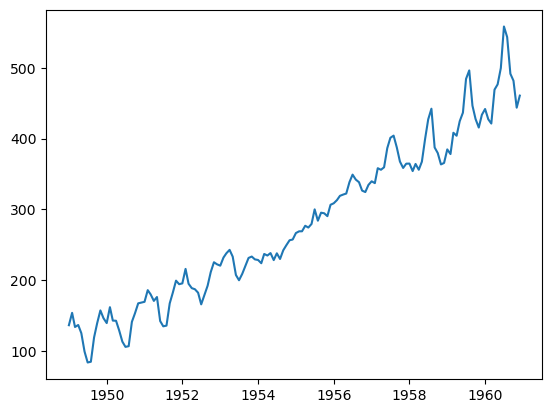

In [126]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data['Sales'], model='additive', period=12)
data['Sales'].interpolate(inplace=True)#Remove missing values
deseason_temp = data['Sales'] - decomposition.seasonal
plt.plot(deseason_temp)



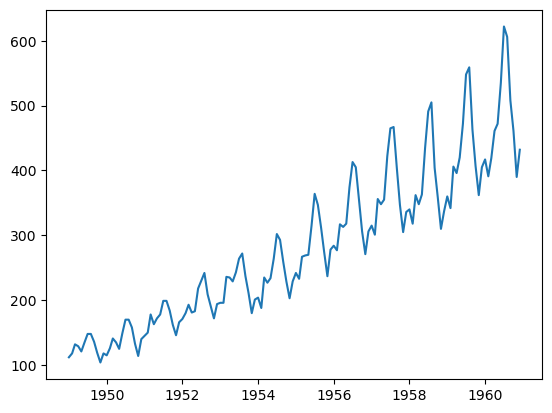

In [130]:
plt.plot(data)

# #Deseasonalizing With A Multiplicative Model

# In a multiplicative model, the observations are modeled as a product of the seasonal component, the trend component, and the error.

# Y(t)=T(t)×S(t)×e(t)

## where:
### Y(t) =observation at time t
### T(t) = trend at time t
### S(t) = seasonal decomposition at time t
### e(t)= error at time t

### Deseasonalizing with a multiplicative model involves dividing the observed values by the seasonal component to obtain the deseasonalized values.

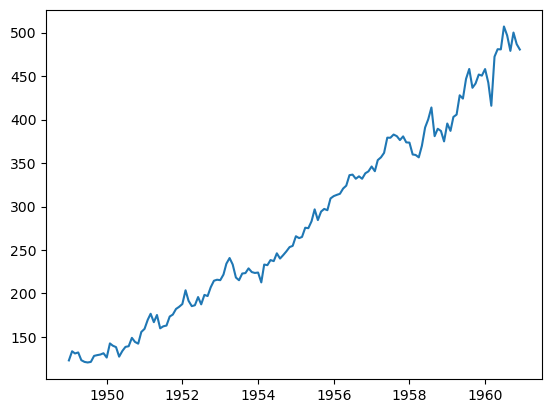

In [151]:
decomposition = seasonal_decompose(data['Sales'], model='multiplicative', period=12)
deseason_temp2 = data['Sales'] / decomposition.seasonal
plt.plot(deseason_temp2)


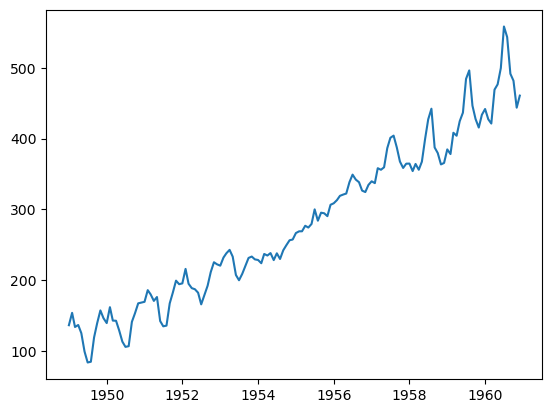

In [155]:
plt.plot(deseason_temp)#Additive model

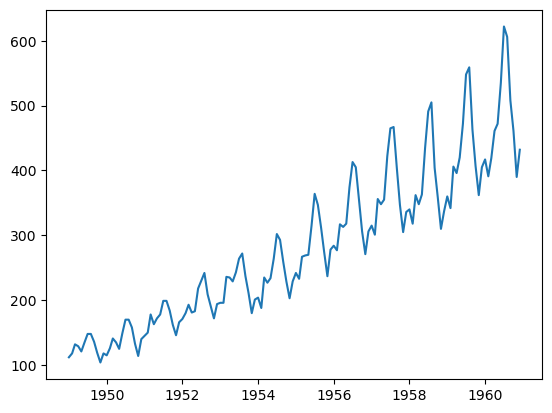

In [161]:
# without Additive and multiplicative model 
plt.plot(data)

# What Is Detrending?

### In plain English, a trend means that the values of the time series may increase or decrease over time.
### For example, the number of visitors to a website may increase as the website becomes more popular
### Sometimes we want to analyze the data without the trend to capture other patterns like seasonality or noise.
### In these situations, detrending can help uslp us.

# Y(t)=T(t)+S(t)+e(t)
### Y(t) is the original time series
### T(t) is the trend
### S(t) is the seasonal component
### e(t) is the noise




# So, to detrend a time series, we need to estimate the trend component and then subtract it from the original data, leaving us with only the seasonal component and the noise.

# Detrending With A Constant Model

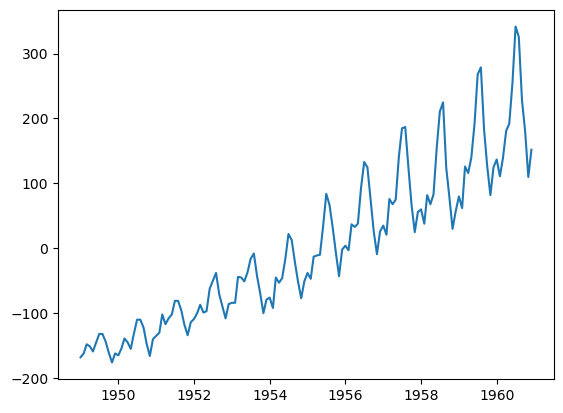

In [170]:
# BY DIFFERENT MODELS -
from scipy.signal import detrend

detrended = detrend(data['Sales'], type='constant')
detrended = pd.Series(detrended, index=data.index)
plt.plot(detrended)

# Detrending With A Linear Model

### It’s rare to find a time series where the trend is a simple horizontal line through time, but it’s very common to find a linear trend.


In [177]:
detrended = detrend(data['Sales'], type='linear')
detrended = pd.Series(detrended, index=data.index)

# Detrending With A Quadratic Model
### If you find that the linear model is not enough to remove the trend, you can try a quadratic model.

In [181]:
from statsmodels.tsa.tsatools import detrend

detrended = detrend(data['Sales'], order=2)

# Detrending With A Moving Average Model
## When you trend changes over time, you can use a moving average model to smooth out the trend.
### 
This model calculates the average value of the data over a certain window and subtracts it from each data point, resulting in a smoothed version of the time series.### 

We can use the rolling function from the pandas library to calculate the moving average.

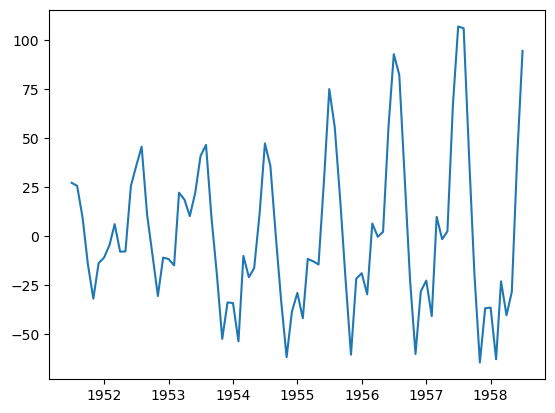

In [186]:
rolling_mean = data['Sales'].rolling(window=60, center=True).mean()
detrended5 = data['Sales'] - rolling_mean
plt.plot(detrended5)

# How To Select The Best Detrending Model?

### Always start by visually inspecting the data after applying each model.
### 
This will give you a good idea of how well each model is detrending the data.### 

Look for any remaining trend, oscillations, or patterns that might suggest that the model is not fully capturing the underlying trend in the data.